In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
import string
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download("vader_lexicon")
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# Baca data dari file Excel dan gabungkan
dataGI = pd.read_csv('garudaIndonesia.csv', sep=';')
dataCL = pd.read_csv('citilink.csv', sep=';')
dataBA = pd.read_csv('batikAir.csv', sep=';')
dataAJ = pd.read_csv('airJet.csv', sep=';')
dataPA = pd.read_csv('pelitaAir.csv', sep=';')
data = pd.concat([dataGI, dataCL, dataBA, dataAJ, dataPA])


In [ ]:
data.head(10)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat Nov 04 22:59:40 +0000 2023,1720938895205093881,Garuda Indonesia も学割あり。Sydney、Melbourne、Perth ...,0,0,0,2,ja,1492788391817084929,1720938895205093881,iqyomi,https://twitter.com/iqyomi/status/172093889520...
1,Sat Nov 04 14:20:26 +0000 2023,1720808223668920546,I wish Garuda Indonesia would make a playlist ...,0,0,0,0,en,116080782,1720807760940741019,wecism,https://twitter.com/wecism/status/172080822366...
2,Sat Nov 04 13:18:09 +0000 2023,1720792548518883557,Dirut Garuda Indonesia Irfan Setiaputra pastik...,0,0,1,1,in,759692754985242625,1720792548518883557,kumparan,https://twitter.com/kumparan/status/1720792548...
3,Sat Nov 04 12:39:05 +0000 2023,1720782718437568919,Pesawat Garuda Indonesia tujuan Ambon-Jakarta ...,0,0,0,0,in,759692754985242625,1720782718437568919,kumparan,https://twitter.com/kumparan/status/1720782718...
4,Sat Nov 04 12:05:49 +0000 2023,1720774348410417418,My very first capture at YIA...👌😊 . Arrived a...,0,0,2,5,en,1247583472740233216,1720774348410417418,stamaviation,https://twitter.com/stamaviation/status/172077...
5,Sat Nov 04 12:02:37 +0000 2023,1720773543812796533,Penumpang pesawat Garuda Indonesia rute Ambon-...,0,0,0,1,in,759692754985242625,1720773543812796533,kumparan,https://twitter.com/kumparan/status/1720773543...
6,Sat Nov 04 11:53:05 +0000 2023,1720771143970459795,Pesawat Garuda Indonesia tujuan Ambon-Jakarta ...,0,0,0,2,in,759692754985242625,1720771143970459795,kumparan,https://twitter.com/kumparan/status/1720771143...
7,Sat Nov 04 11:09:33 +0000 2023,1720760189383807193,Pesawat Garuda Indonesia tujuan Ambon-Jakarta ...,0,0,0,0,in,759692754985242625,1720760189383807193,kumparan,https://twitter.com/kumparan/status/1720760189...
8,Sat Nov 04 10:32:59 +0000 2023,1720750983217864979,"@anasbadlatif Presiden Indonesia, Joko Widodo ...",0,0,0,7,in,1695571783418777600,1720598149902029199,RidwanRidw65219,https://twitter.com/RidwanRidw65219/status/172...
9,Sat Nov 04 10:14:16 +0000 2023,1720746273404567746,"KEMASKINI Presiden Indonesia, Joko Widodo mer...",32,46,3286,6054,in,2194068895,1720746273404567746,Marchfoward,https://twitter.com/Marchfoward/status/1720746...


In [ ]:
data.to_csv('data.csv', index=False)

In [ ]:
file_path = 'data.csv'
data.to_csv(file_path, index=False)

In [ ]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["full_text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["full_text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["full_text"]]
data["Compound"] = [sentiments.polarity_scores(i)["compound"] for i in data["full_text"]]

score= data["Compound"].values
sentiment = []
for i in score:
  if i >= 0.05:
    sentiment.append('positif')
  elif i <= -0.05 :
    sentiment.append('negatif')
  else:
    sentiment.append('netral')
data["sentiment"] = sentiment

data = data[['full_text', 'sentiment']]

data['sentiment'].value_counts()

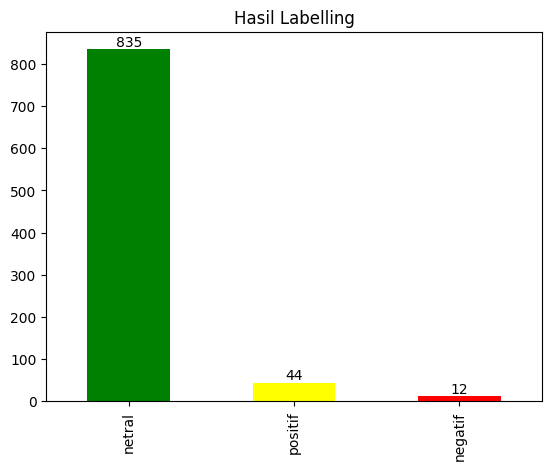

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

count_Class = pd.value_counts(data["sentiment"], sort=True)
ax = count_Class.plot(kind='bar', color=["green", "yellow", "red"])
plt.title('Hasil Labelling')

# Menambahkan teks jumlah di atas masing-masing batang
for i, v in enumerate(count_Class):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [ ]:
data['casefolding'] = data['full_text'].str.lower()

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus @..
    text = re.sub(r'#', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]+', '', text) # menghapus RT
    text = re.sub(r'https?:\/\/\S+', '', text) # menghapus url
    text = re.sub(r':\)', '', text) # menghapus icon
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text) # menghapus single character
    text = re.sub(r'\s+', ' ', text) # menghapus spasi ganda
    text = re.sub(r'[^\w\s]', '', text) # menghapus punctuation
    text = re.sub(r'\.+', '', text) #menghilangkan teks yang mengandung akhiran MULTIPLE TITIK (...)
    text = re.sub(r'\d+', '', text) #menghilangkan teks yang mengandung angka
    text = re.sub(r'\b\w{1,2}\b', '', text) #menghilangkan teks yang mengandung 1-2 huru
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.encode('ascii', 'ignore').decode('ascii') # menghapus non-ascii (EMOTICON)
    return text

data['cleansing'] = data['casefolding'].apply(clean_text)
# delete row with null value
data = data.dropna()
# menghapus row yang memiliki nilai text kosong
data = data[data['cleansing'] != '']
data.reset_index(drop=True, inplace = True)
# Menghapus text duplikat
data.cleansing.duplicated().sum()
data.loc[data.cleansing.duplicated(), :]
data.drop_duplicates(subset=['cleansing'], inplace=True)
data.reset_index(drop=True, inplace = True)

#TOKENIZING
def tokenizing(text):
    nstr = text.split(' ')
    md= []
    a = -1
    for hu in nstr:
        a = a + 1
    if hu == '':
        md.append(a)
    p = 0
    b = 0
    for q in md:
        b = q - p
        del nstr[b]
        p = p + 1
    return nstr

data['tokenizing'] = data['cleansing'].apply(tokenizing)

def stopword_removal(text):
    factory = stopwords.words('indonesian', 'english')
    x = []
    dkk = []
    def myFunc(x):
        if x in factory:
            return False
        else:
            return True
    fit = filter(myFunc, text)
    for x in fit:
        dkk.append(x)
    return dkk
data['stopword_removal'] = data['tokenizing'].apply(stopword_removal)
data.to_excel('all_preprocessing.xlsx')
data.head()

,full_text,sentiment,casefolding,cleansing,tokenizing,stopword_removal
0,Bagaimana Kita Harus Bersikap Pemilu yang sud...,netral,bagaimana kita harus bersikap pemilu yang sud...,bagaimana kita harus bersikap pemilu yang suda...,"[bagaimana, kita, harus, bersikap, pemilu, yan...","[bersikap, pemilu, tahapan, berjalan, pendafta..."
1,"Usia Prabowo Subianto, Ganjar Pranowo dan Anie...",netral,"usia prabowo subianto, ganjar pranowo dan anie...",usia prabowo subianto ganjar pranowo dan anies...,"[usia, prabowo, subianto, ganjar, pranowo, dan...","[usia, prabowo, subianto, ganjar, pranowo, ani..."
2,@idextratime Pilihanku Pemimpin Non-Petugas Pa...,netral,@idextratime pilihanku pemimpin non-petugas pa...,pilihanku pemimpin nonpetugas partai anies ba...,"[, pilihanku, pemimpin, nonpetugas, partai, an...","[, pilihanku, pemimpin, nonpetugas, partai, an..."
3,@RomeoWalker19 Luar biasa lom pernah saya meli...,netral,@romeowalker19 luar biasa lom pernah saya meli...,luar biasa lom pernah saya melihat dalam seja...,"[, luar, biasa, lom, pernah, saya, melihat, da...","[, lom, sejarah, pemilu, pasangan, capres, caw..."
4,Anies Baswedan dan Muhaimin Iskandar menjalani...,netral,anies baswedan dan muhaimin iskandar menjalani...,anies baswedan dan muhaimin iskandar menjalani...,"[anies, baswedan, dan, muhaimin, iskandar, men...","[anies, baswedan, muhaimin, iskandar, menjalan..."


In [ ]:
data = data[['stopword_removal', 'sentiment']]
data.rename(columns={'stopword_removal':'text'}, inplace=True)
data.to_csv('data.csv', index=False)


<ipython-input-8-93d07c4f22ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'stopword_removal':'text'}, inplace=True)


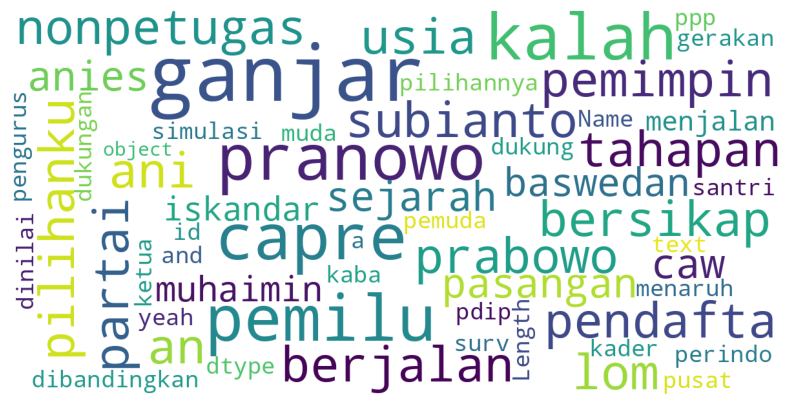

In [ ]:
# show wordlcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

stopwords = stopwords.words('indonesian')

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data['text'])

In [ ]:
# Baca data dari file CSV
df = pd.read_csv('data.csv')
df = df[['text', 'sentiment']]

# Bagi data menjadi data latih dan data uji
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ekstraksi fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Melatih model dengan Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Melakukan prediksi
y_pred = clf.predict(X_test)

# Menampilkan hasil
print("Accuracy:", accuracy_score(y_test, y_pred))

# Menampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.935251798561151
Classification Report:
              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         2
      netral       0.94      1.00      0.97       130
     positif       0.00      0.00      0.00         7

    accuracy                           0.94       139
   macro avg       0.31      0.33      0.32       139
weighted avg       0.87      0.94      0.90       139



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=['Hasil Label Negatif', 'Hasil Label Netral', 'Hasil Label Positif'], columns=['Prediksi negatif', 'Prediksi netral', 'Prediksi positif'])




,Prediksi negatif,Prediksi netral,Prediksi positif
Hasil Label Negatif,0,2,0
Hasil Label Netral,0,130,0
Hasil Label Positif,0,7,0
